In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Twitter Sentiment Analysis

In [2]:
df=pd.read_csv('twitter.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
df1=df.copy()

### > Data Cleaning

In [4]:
df1=df1.drop('id',axis=1)

In [5]:
tweet_data=df1['tweet'].copy()

In [6]:
tweet_data.head()

0     @user when a father is dysfunctional and is s...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
Name: tweet, dtype: object

In [7]:
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from nltk.tokenize import word_tokenize

In [8]:
df1['length']=df1['tweet'].apply(lambda c: len(c))

In [9]:
df1.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


In [10]:
df1.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [11]:
import string
import nltk

#### Data Preprocessing

In [12]:
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for i in r:
        input_txt=re.sub(i,'',input_txt)
        
    return input_txt    
    

- From the tweets "@user" which does not help us with predicitng output will be removed
- Punctuations, symbols will be removed
- Three letter words like umm,hmm,ahh,etc will be removed
- For improving the model, concepts of NLP will be applied, namely, Stemming.

In [13]:
df1['clean_tweet']=np.vectorize(remove_pattern)(df1['tweet'],"@[\w]*")

In [14]:
df1.head()

,label,tweet,length,clean_tweet
0,0,@user when a father is dysfunctional and is s...,102,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,122,thanks for #lyft credit i can't use cause th...
2,0,bihday your majesty,21,bihday your majesty
3,0,#model i love u take with u all the time in ...,86,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,39,factsguide: society now #motivation


In [15]:
df1['clean_tweet']=df1['clean_tweet'].str.replace("[^a-zA-Z0-9#]", " ")

In [16]:
df1.head()

,label,tweet,length,clean_tweet
0,0,@user when a father is dysfunctional and is s...,102,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,122,thanks for #lyft credit i can t use cause th...
2,0,bihday your majesty,21,bihday your majesty
3,0,#model i love u take with u all the time in ...,86,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,39,factsguide society now #motivation


In [17]:
df1['clean_tweet'] = df1['clean_tweet'].apply(lambda c: ' '.join([w for w in c.split() if len(w)>3]))

In [18]:
tokens=df1['clean_tweet'].apply(lambda x: x.split())
tokens.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [20]:
for i in range (len(tokens)):
    tokens[i]=' '.join(tokens[i])
    
df1['clean_tweet']=tokens    

### > Data Analysis and Visualization

In [21]:
df1.head()

,label,tweet,length,clean_tweet
0,0,@user when a father is dysfunctional and is s...,102,when father dysfunct selfish drag kid into dys...
1,0,@user @user thanks for #lyft credit i can't us...,122,thank #lyft credit caus they offer wheelchair ...
2,0,bihday your majesty,21,bihday your majesti
3,0,#model i love u take with u all the time in ...,86,#model love take with time
4,0,factsguide: society now #motivation,39,factsguid societi #motiv


In [22]:
from wordcloud import WordCloud

- WordCloud Of Tweets over the whole data

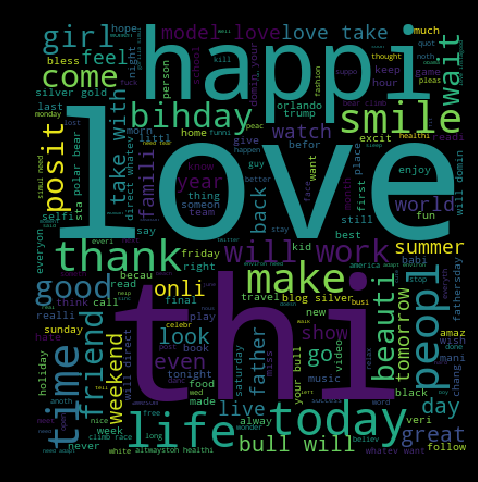

In [23]:
hit_words=''.join(list(df1['clean_tweet']))
hit_wc=WordCloud(width=400,height=400).generate(hit_words)
plt.figure(figsize=(10,8),facecolor='k')
plt.title('WordCloud of Positive Tweets')
plt.imshow(hit_wc)


- WordCloud of positive tweet

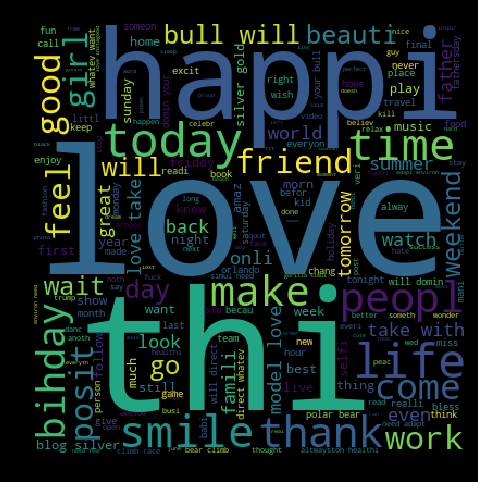

In [24]:
hit_words=''.join([text for text in df1['clean_tweet'][df1['label']==0]])
hit_wc=WordCloud(width=400,height=400).generate(hit_words)
plt.figure(figsize=(10,8),facecolor='k')
plt.title('WordCloud of Positive Tweets')
plt.imshow(hit_wc)


- WordCloud of Negative Tweet

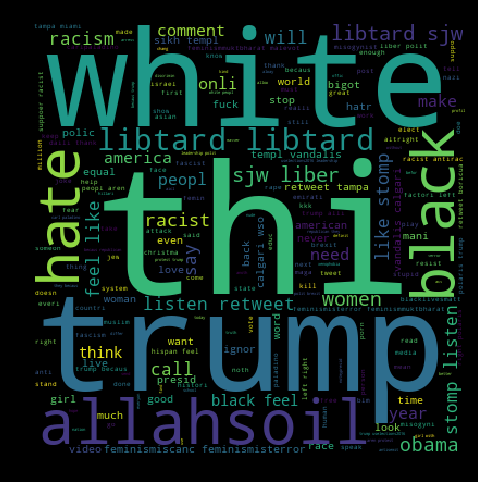

In [25]:
hit_words=''.join([text for text in df1['clean_tweet'][df1['label']==1]])
hit_wc=WordCloud(width=400,height=400).generate(hit_words)
plt.figure(figsize=(10,8),facecolor='k')
plt.title('WordCloud of Positive Tweets')
plt.imshow(hit_wc)


In [26]:
def extract_hashtags(x):
    hashtags=[]
    for i in x:
        ht=re.findall(r"#(\w+)",i)
        hashtags.append(ht)
        
    return hashtags    

In [27]:
positive_hashtags=extract_hashtags(df1['clean_tweet'][df1['label']==0])
negative_hashtags=extract_hashtags(df1['clean_tweet'][df1['label']==1])

positive_hashtags=sum(positive_hashtags,[])
negative_hashtags=sum(negative_hashtags,[])

In [28]:
import seaborn as sns

- Most used hashtags in Positive tweets

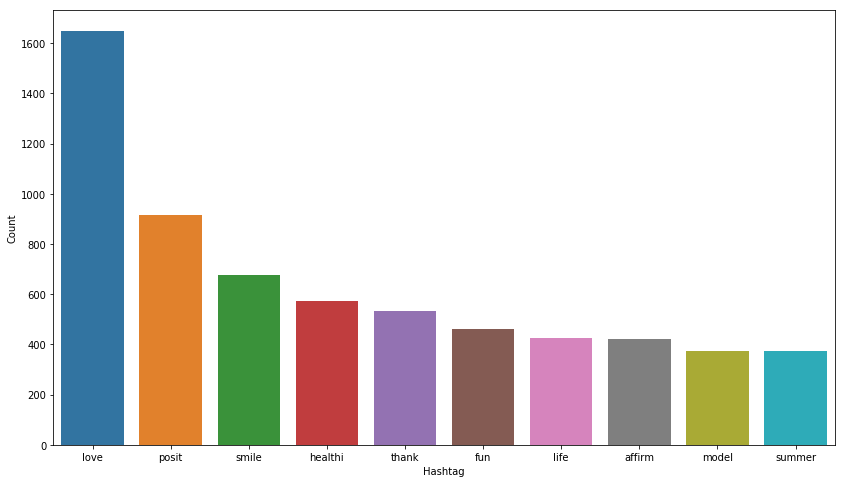

In [29]:
a=nltk.FreqDist(positive_hashtags)
d=pd.DataFrame({'Hashtag':list(a.keys()),
                'Count':list(a.values())})
d=d.nlargest(columns="Count", n=10)
plt.figure(figsize=(14,8))
ax=sns.barplot(data=d,x='Hashtag',y='Count')
ax.set(ylabel='Count')
plt.show()

- Most used Negative tweets

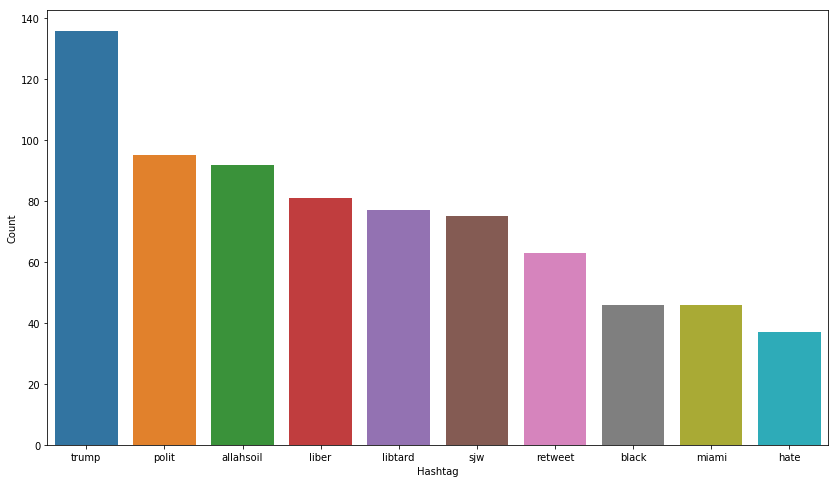

In [30]:
a=nltk.FreqDist(negative_hashtags)
d=pd.DataFrame({'Hashtag':list(a.keys()),
                'Count':list(a.values())})
d=d.nlargest(columns="Count", n=10)
plt.figure(figsize=(14,8))
ax=sns.barplot(data=d,x='Hashtag',y='Count')
ax.set(ylabel='Count')
plt.show()

### > Data Modeling

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(max_df=0.9,min_df=10,max_features=1000,stop_words='english')
tfidf=vectorizer.fit_transform(df1['clean_tweet'])

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
tweet_train,tweet_test,label_train,label_test= train_test_split(tfidf,df1['label'],test_size=0.2,random_state=42)

- Applying Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

tweets_model=LogisticRegression(solver='saga',penalty='l2')
tweets_model.fit(tweet_train,label_train)
pred=tweets_model.predict(tweet_test)
print("accuracy score is",accuracy_score(label_test,pred))
print("f1_score is",f1_score(label_test,pred))




accuracy score is 0.9466604098232442
f1_score is 0.4713178294573644


In [35]:
from sklearn.metrics import classification_report
print(classification_report(label_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5937
           1       0.80      0.33      0.47       456

   micro avg       0.95      0.95      0.95      6393
   macro avg       0.88      0.66      0.72      6393
weighted avg       0.94      0.95      0.94      6393



In [36]:
pd.DataFrame(confusion_matrix(label_test,pred),index=[['actual', 'actual'], ['positive', 'negative']],
    columns=[['predicted', 'predicted'], ['positive', 'negative']]
)

predicted         
                 positive negative
actual positive      5900       37
       negative       304      152

- Applying Naive Bayes

In [37]:
from sklearn.naive_bayes import MultinomialNB


In [38]:
clf=MultinomialNB()
clf.fit(tweet_train,label_train)
pred=clf.predict(tweet_test)
print("accuracy score is",accuracy_score(label_test,pred))
print("f1_score is",f1_score(label_test,pred))



accuracy score is 0.9446269357109338
f1_score is 0.4290322580645161


In [39]:
print(classification_report(label_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5937
           1       0.81      0.29      0.43       456

   micro avg       0.94      0.94      0.94      6393
   macro avg       0.88      0.64      0.70      6393
weighted avg       0.94      0.94      0.93      6393



In [40]:
pd.DataFrame(confusion_matrix(label_test,pred),index=[['actual', 'actual'], ['positive', 'negative']],
    columns=[['predicted', 'predicted'], ['positive', 'negative']]
)

predicted         
                 positive negative
actual positive      5906       31
       negative       323      133

 Using Logisitc Regression after preprocessing, we are getting a F1 score of 0.41
 Using Naive Bayes we are getting a F1 score of 0.40.
 Now, lets try a differnt approach, before applying this model and see our F1 score.

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
df1.head()

,label,tweet,length,clean_tweet
0,0,@user when a father is dysfunctional and is s...,102,when father dysfunct selfish drag kid into dys...
1,0,@user @user thanks for #lyft credit i can't us...,122,thank #lyft credit caus they offer wheelchair ...
2,0,bihday your majesty,21,bihday your majesti
3,0,#model i love u take with u all the time in ...,86,#model love take with time
4,0,factsguide: society now #motivation,39,factsguid societi #motiv


#### Bag of Words

In [43]:
bow_vec=CountVectorizer(max_df=0.9,min_df=2,max_features=1000,stop_words='english')
bow=bow_vec.fit_transform(df1['clean_tweet'])

In [44]:
Tf_vec=TfidfVectorizer(max_df=0.9,min_df=10,max_features=1000,stop_words='english')
TFidf=Tf_vec.fit_transform(df1['clean_tweet'])

In [45]:
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

##### Logistic Regression

In [46]:
xtrain_bow, xtest_bow, ytrain, ytest = train_test_split(train_bow, df1['label'], random_state=42, test_size=0.3)

tweets_model = LogisticRegression()
tweets_model.fit(xtrain_bow, ytrain) # training the model
prediction = tweets_model.predict_proba(xtest_bow) # predicting on the testing set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

print("f1_score is",f1_score(ytest, prediction_int))
print("accuracy_score is",accuracy_score(ytest, prediction_int))

C:\Users\AARYA BRAHMANE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


f1_score is 0.5563786008230452
accuracy_score is 0.9437897590989676


In [47]:
print(classification_report(ytest,prediction_int))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8905
           1       0.64      0.49      0.56       684

   micro avg       0.94      0.94      0.94      9589
   macro avg       0.80      0.74      0.76      9589
weighted avg       0.94      0.94      0.94      9589



In [48]:
pd.DataFrame(confusion_matrix(ytest,prediction_int),index=[['actual', 'actual'], ['positive', 'negative']],
    columns=[['predicted', 'predicted'], ['positive', 'negative']]
)

predicted         
                 positive negative
actual positive      8712      193
       negative       346      338

##### NaiveBayes

In [49]:
tweets_model = MultinomialNB()
tweets_model.fit(xtrain_bow, ytrain) # training the model
prediction = tweets_model.predict_proba(xtest_bow) # predicting on the testing set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

print("f1_score is",f1_score(ytest, prediction_int))
print("accuracy_score is",accuracy_score(ytest, prediction_int))

f1_score is 0.5151515151515151
accuracy_score is 0.9199082281781208


In [50]:
print(classification_report(ytest,prediction_int))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      8905
           1       0.45      0.60      0.52       684

   micro avg       0.92      0.92      0.92      9589
   macro avg       0.71      0.77      0.74      9589
weighted avg       0.93      0.92      0.92      9589



In [51]:
pd.DataFrame(confusion_matrix(ytest,prediction_int),index=[['actual', 'actual'], ['positive', 'negative']],
    columns=[['predicted', 'predicted'], ['positive', 'negative']]
)

predicted         
                 positive negative
actual positive      8413      492
       negative       276      408

##### NaiveBayes using TfIdf

In [52]:
train_tfidf = TFidf[:31962,:]
test_tfidf = TFidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xtest_tfidf = train_tfidf[ytest.index]



In [53]:
tweets_model = MultinomialNB()
tweets_model.fit(xtrain_tfidf, ytrain) # training the model
prediction = tweets_model.predict_proba(xtest_tfidf) # predicting on the testing set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

print("f1_score is",f1_score(ytest, prediction_int))
print("accuracy_score is",accuracy_score(ytest, prediction_int))

f1_score is 0.529567519858782
accuracy_score is 0.944415476066326


##### Support Vector Machine

In [54]:
from sklearn import svm

svc=svm.SVC(kernel='linear',C=1,probability=True).fit(xtrain_bow,ytrain)
prediction = svc.predict_proba(xtest_bow) # predicting on the testing set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

print("f1_score is",f1_score(ytest, prediction_int))
print("accuracy_score is",accuracy_score(ytest, prediction_int))

f1_score is 0.5268817204301075
accuracy_score is 0.944936906872458


SVM with TFIDF

In [55]:
train_tfidf = TFidf[:31962,:]
test_tfidf = TFidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xtest_tfidf = train_tfidf[ytest.index]

In [60]:
svc=svm.SVC(kernel='linear',C=1,probability=True).fit(xtrain_bow,ytrain)
prediction = svc.predict_proba(xtest_tfidf) # predicting on the testing set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

print("f1_score is",f1_score(ytest, prediction_int))
print("accuracy_score is",accuracy_score(ytest, prediction_int))


f1_score is 0.29405405405405405
accuracy_score is 0.9319011367191574


RandomForestClassifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100)
rf.fit(xtrain_bow,ytrain)
prediction=rf.predict(xtest_bow)
print("f1_score is",f1_score(ytest, prediction_int))
print("accuracy_score is",accuracy_score(ytest, prediction_int))

f1_score is 0.29405405405405405
accuracy_score is 0.9319011367191574


RandomForestClassifier with TFIDF

In [58]:
train_tfidf = TFidf[:31962,:]
test_tfidf = TFidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xtest_tfidf = train_tfidf[ytest.index]

In [59]:
rf=RandomForestClassifier(n_estimators=100)

rf.fit(xtrain_tfidf,ytrain)
prediction=rf.predict(xtest_tfidf)
print("f1_score is",f1_score(ytest, prediction))
print("accuracy_score is",accuracy_score(ytest, prediction))

f1_score is 0.5652565256525652
accuracy_score is 0.9496297841276463


We are getting the best results with random forest classifir with TFIDF, f1_score of 0.56 and accuracy score of 0.94. Followed by Logistic Regression, f1_score 0.55 and accuracy score of 0.94. 